In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [3]:
df = pd.read_csv("/content/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


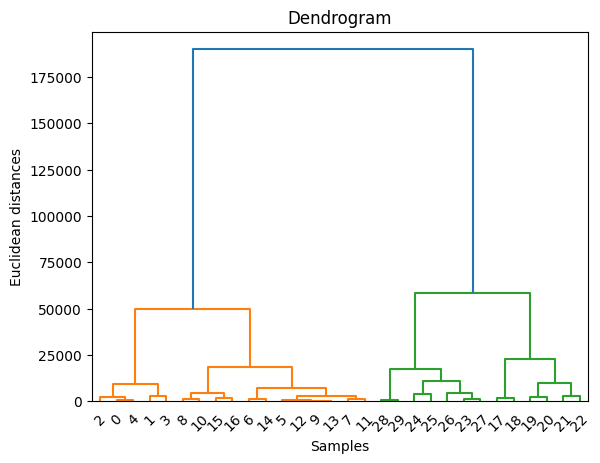

In [5]:
# Find the optimal number of clusters (K) using the dendrogram method
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [7]:
n_clusters = 3
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')


clusters = agg_cluster.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [9]:
silhouette_avg = silhouette_score(df, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6419286110303509


In [10]:
df['Cluster'] = clusters

# Analyze the characteristics of each cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

         YearsExperience         Salary
Cluster                                
0               3.211765   54570.235294
1               6.500000   91617.333333
2               9.400000  114670.285714
